In [2]:
import get_surya 
import get_funsd 
import get_azure

In [3]:
funsd = get_funsd.CustomFunsdDataset()
funsd.split_generators()

In [4]:
surya = get_surya.CustomSuryaDataset()
surya.split_generators()

In [5]:
azure = get_azure.CustomAzureDataset()
azure.split_generators()

In [6]:
azure['train'][0].keys()

dict_keys(['id', 'tokens', 'line_boxes', 'bboxes', 'handwritings', 'image', 'image_name'])

In [7]:
surya['train'][0].keys()

dict_keys(['id', 'tokens', 'line_boxes', 'image', 'image_name'])

In [8]:
funsd

CustomFunsdDataset:
DatasetDict({
    train: Dataset({features: ['id', 'tokens', 'ner_boxes', 'bboxes', 'ner_tags','line_ids','linkings','image','image_name'], num_rows: 149}),
    test: Dataset({features: ['id', 'tokens', 'ner_boxes', 'bboxes', 'ner_tags','line_ids','linkings','image','image_name'], num_rows: 50})
})

In [9]:
len(surya['train'][113]['tokens']),len(azure['train'][113]['tokens']),len(funsd['train'][113]['tokens'])

(126, 154, 150)

#### Azure doesnt have non asci boxesss SOS

In [10]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)  # ASCII characters have ordinals less than 128

for i, img in enumerate(funsd['train']):
    tokens = funsd['train'][i]['tokens']
    boxes = funsd['train'][i]['ner_boxes']
     
    for j,token in enumerate(tokens):
        if not is_ascii(token):  # Check if token contains non-ASCII characters
            
            same_entity = [funsd['train'][i]['tokens'][k]
                           for k in range(len(funsd['train'][i]['ner_boxes'])) 
                     if funsd['train'][i]['ner_boxes'][k] == list(boxes[j])] 
                    

            if len(same_entity)  == 1 :
                print(token)
                print(funsd['train'][i]['linkings'][j])
                print(img['image_name'], i)


☑
[7]
0001485288.json 15
☑
[10]
00040534.json 16
☑
[57]
00040534.json 16
☑
[2]
0060036622.json 44
☑
[58]
0060077689.json 46
Tοpic
[79]
0060262650.json 56
☑
[15]
00836244.json 63
☑
[1]
00851772_1780.json 67
☑
[7]
00851879.json 68
☑
None
00860012_00860014.json 69
☑
[57]
00866042.json 71
☑
[54]
00866042.json 71
☑
[8]
01073843.json 75
☑
[15]
12825369.json 85
☑
[1]
13149651.json 86
☑
[49]
13149651.json 86
☑
[11]
13149651.json 86
☐
[52]
13149651.json 86
☐
[52]
13149651.json 86
☑
[16]
13149651.json 86
☑
[17]
13149651.json 86
Bogotá:
[43, 42]
71563825.json 94
☑
[8]
716552.json 96
☑
[6]
716552.json 96
☐
None
716552.json 96
☑
[12]
716552.json 96
☑
[2]
80310840a.json 97
☑
[34]
81619511_9513.json 105
☑
[12]
87672097.json 109
☑
[14]
87672097.json 109
☑
[10]
89817999_8002.json 115
☑
[18]
91856041_6049.json 127
☑
[20]
91856041_6049.json 127
198–
None
91903177.json 128
☑
[22]
92586242.json 141
☑
[20]
92586242.json 141


#### F1 ( without any post proccesing of ocr output)

In [11]:
tp_list = []
fp_list = []
fn_list = []
precision_list = []
recall_list = []
f1score_list = []

for i,img in enumerate(funsd['train']):    
    
     # Number of tokens that are common between
     # the Azure OCR output and the FUNSD ground truth tokens
     
    # correctly identified tokens
    tp = len(set(azure['train'][i]['tokens']) & set(funsd['train'][i]['tokens']))
    tp_list.append(tp)
    
    
    
    # Number of tokens identified by Azure OCR but not present in the ground truth.
    # extra tokens
    fp = len(set(azure['train'][i]['tokens'])) - tp
    fp_list.append(fp)
    
    
    # Number of tokens present in the ground truth but not identified by Azure OCR.
    # Missed tokens.
    fn = len(set(funsd['train'][i]['tokens'])) - tp
    fn_list.append(fn)
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    
    # appending precision, recall, and F1 score to the list
    precision_list.append(precision)
    recall_list.append(recall)
    f1score_list.append(f1)



import numpy as np

# Compute the mean and standard deviation of the precision, recall, and F1 score across all documents
mean_f1 = np.mean(f1score_list)
std_f1 = np.std(f1score_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)

print('Mean F1 score:', mean_f1)
print('Standard deviation of F1 score:', std_f1)
print('Mean precision:', mean_precision)
print('Standard deviation of precision:', std_precision)
print('Mean recall:', mean_recall)
print('Standard deviation of recall:', std_recall)

# Calculate overall true positives, false positives, and false negatives
tp_sum = sum(tp_list)
fp_sum = sum(fp_list)
fn_sum = sum(fn_list)

# Calculate overall F1 score, precision, and recall
overall_f1 = 2 * tp_sum  / (2 * tp_sum  + fp_sum + fn_sum)
overall_precision = tp_sum  / (tp_sum  + fp_sum)
overall_recall = tp_sum  / (tp_sum  + fn_sum)

print(f"Overall F1 score: {overall_f1:.3f}")
print(f"Overall_precision: {overall_precision:.3f}")
print(f"Overall_recall: {overall_recall:.3f}")

Mean F1 score: 0.8192210236148881
Standard deviation of F1 score: 0.08188440072504155
Mean precision: 0.8225516923417886
Standard deviation of precision: 0.07995109953191752
Mean recall: 0.8178573562968315
Standard deviation of recall: 0.09118747931939568
Overall F1 score: 0.816
Overall_precision: 0.819
Overall_recall: 0.813


### IOU computation

In [12]:
def iou(gt_box, ocr_line_box):
    x1, y1, x2, y2 = gt_box
    x1_p, y1_p, x2_p, y2_p = ocr_line_box

    xi1 = max(x1, x1_p)
    yi1 = max(y1, y1_p)
    xi2 = min(x2, x2_p)
    yi2 = min(y2, y2_p)
    
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    gt_box_area = (x2 - x1) * (y2 - y1)
    ocr_line_box_area = (x2_p - x1_p) * (y2_p - y1_p)
    
    union_area = gt_box_area + ocr_line_box_area - inter_area
    return inter_area / union_area if union_area else 0
  

In [13]:
def is_box_inside(inner_box, outer_box):
    
    # Check if inner_box is inside outer_box with tolerances proportional to the size of the inner box.

    max_x_inner = max(inner_box[0], inner_box[2])
    min_x_inner = min(inner_box[0], inner_box[2])
    
    min_y_inner = min(inner_box[1], inner_box[3])
    max_y_inner = max(inner_box[1], inner_box[3])
    
    max_x_outer = max(outer_box[0], outer_box[2])
    min_x_outer = min(outer_box[0], outer_box[2])
    
    min_y_outer = min(outer_box[1], outer_box[3])
    max_y_outer = max(outer_box[1], outer_box[3])
    
    inner_width = max_x_inner - min_x_inner
    inner_height = max_y_inner - min_y_inner
    
    tolerance_x = 0.2*inner_width 
    tolerance_y = 0.2*inner_height 
    
    return (
        min_x_inner >= min_x_outer - tolerance_x and          # inner x_min >= outer x_min - tolerance_x
        min_y_inner >= min_y_outer - tolerance_y and          # inner y_min >= outer y_min - tolerance_y
        max_x_inner <= max_x_outer + tolerance_x and          # inner x_max <= outer x_max + tolerance_x
        max_y_inner <= max_y_outer + tolerance_y              # inner y_max <= outer y_max + tolerance_y
    )


In [14]:
surya['train'][0].keys(),azure['train'][0].keys()

(dict_keys(['id', 'tokens', 'line_boxes', 'image', 'image_name']),
 dict_keys(['id', 'tokens', 'line_boxes', 'bboxes', 'handwritings', 'image', 'image_name']))

### 2. Levenshtein evaluation

(as in FUNSD paper https://arxiv.org/pdf/1905.13538v2)

Using:

1. IOU and 

2. Checking if box is inside for line detetion ocr, taking the smallest 
Levenshtein similarity out of all the line tokens

In [15]:
from Levenshtein import distance as levenshtein_distance

def ocr_evaluation_levenshtein(word1, word2):
    distance = levenshtein_distance(word1, word2)
    max_len = max(len(word1), len(word2))
    assert max_len > 0 , "Levenshtein distance is not defined for empty strings"
    return 1 - (distance / max_len) 


In [16]:
import itertools

def all_substrings(s):
    substrings = []
    for i, j in itertools.combinations(range(len(s) + 1), 2):
        substrings.append(s[i:j])
    return substrings


def max_similarity_from_list(word, strings):
    max_similarity = float('-inf')  # Initialize to negative infinity
    closest_string = None
    
    for s in strings:
        similarity = ocr_evaluation_levenshtein(word, s)
        if similarity > max_similarity:
            max_similarity = similarity
            closest_string = s
    
    # print(max_similarity, closest_string)
    return closest_string


In [17]:


def map_gt_tokens(image_index, ocr, check_function,dataset_type, *args, **kwargs):

         
    found_gt_tokens = {str(funsd[dataset_type][image_index]['tokens'][i])+'_*_'+
                       str(funsd[dataset_type][image_index]['bboxes'][i]):[]
                    for i in range(len(funsd[dataset_type][image_index]['tokens']))}

    funsd_bboxes = funsd[dataset_type][image_index]['bboxes']

    # get unique ocr line boxes
    if check_function.__name__ == 'is_box_inside':
        ocr_line_boxes = ocr[dataset_type][image_index]['line_boxes']
        ocr_unique_boxes = list(dict.fromkeys(tuple(box) for box in ocr_line_boxes))
        
        c = 0
        for i, ocr_box in enumerate(ocr_unique_boxes):
            ocr_box = list(ocr_box)
            
            for j, box in enumerate(funsd_bboxes):
                
                if is_box_inside(box, ocr_box,*args, **kwargs):
                    
                    all_line_tokens = [ocr[dataset_type][image_index]['tokens'][k]
                     for k in range(len(ocr[dataset_type][image_index]['line_boxes'])) 
                     if ocr[dataset_type][image_index]['line_boxes'][k] == list(ocr_box)]   
                
                    
                    # Find detected token (among all line tokens of ocr engine with line detection)
                    # with the smallest levenshtein similarity between all line tokens and gt token
                    
                    gt_token = funsd[dataset_type][image_index]['tokens'][j]
                    matched_already = found_gt_tokens[str(gt_token)+'_*_'+
                                    str(funsd[dataset_type][image_index]['bboxes'][j])]
                    
                    matched_already = [token.split('_*_')[0] for token in matched_already]
                    
                    assert len(matched_already) <= 1, "Error in mapping gt tokens to detected tokens"
                    
                    if  matched_already != []:
                        best_similarity = ocr_evaluation_levenshtein(matched_already[0], gt_token)
                    else : 
                        best_similarity = 0
                        
                    best_match = None
                    for det_token in all_line_tokens:
                        similarity = ocr_evaluation_levenshtein(det_token, gt_token)
                        
                        if similarity > best_similarity:
                            best_similarity = similarity
                            best_match = det_token
                    
                    if best_match:
                          found_gt_tokens[str(gt_token)+'_*_'+
                                    str(funsd[dataset_type][image_index]['bboxes'][j])] = [str(best_match)+'_*_'+str(ocr_box)]
                          
                            
        
        inverted_dict = {}  
        found_gt_tokens2 = found_gt_tokens.copy()
        for gt, pred in found_gt_tokens.items():
            if pred == []:
                continue
            
            
            assert len(pred) == 1, "Error in mapping gt tokens to detected tokens"
            
            if pred[0] in inverted_dict:
                inverted_dict[pred[0]].append(gt)
            else:
                inverted_dict[pred[0]] = [gt]
                
        for det, gts in inverted_dict.items():
            if len(gts) <= 1: 
                continue

            sum_gt_tokens = 0
            sum_det_tokens = len(det.split('_*_')[0])
            max_len_gt = 0
            for gt in gts:
                sum_gt_tokens += len(gt.split('_*_')[0])
                if len(gt.split('_*_')[0]) > max_len_gt:
                    max_len_gt = len(gt.split('_*_')[0])
                    max_gt = gt
                
            if sum_gt_tokens != sum_det_tokens:
                for gt in gts:
                    if gt == max_gt: 
                        found_gt_tokens2[max_gt] = [str(det.split('_*_')[0]) + '_*_'+ str(det.split('_*_')[1])]
                    else : 
                        found_gt_tokens2[gt] = []
                        
                continue
            
            substrings = all_substrings(det.split('_*_')[0])
            for gt in gts:
                found_gt_tokens2[gt] = [str(max_similarity_from_list(gt.split('_*_')[0], substrings)) + '_*_'+ str(det.split('_*_')[1])]
                

            
                
        return  found_gt_tokens2
    
    elif check_function.__name__ == 'iou':
        ocr_unique_boxes = ocr[dataset_type][image_index]['bboxes']
        c = 0
        for i, ocr_box in enumerate(ocr_unique_boxes):
            for j, box in enumerate(funsd_bboxes):
                
                if iou(box, ocr_box)>0.5:
                    found_gt_tokens[str(funsd[dataset_type][image_index]['tokens'][j])+'_*_'+
                                    str(funsd[dataset_type][image_index]['bboxes'][j])].append(
                                        str(ocr[dataset_type][image_index]['tokens'][i])+'_*_'+str(ocr_box)
                                    )
                    c+=1
        

        return found_gt_tokens 
        
    else:
        print('Wrong check function')
        return None
    

In [18]:
map_gt_tokens(0,surya, is_box_inside,dataset_type='train')


{'R&D_*_[292, 91, 376, 175]': [],
 ':_*_[219, 316, 225, 327]': [],
 'Suggestion:_*_[95, 355, 169, 370]': ['Suggestion:_*_[92.0, 356.0, 172.0, 370.0]'],
 'Date:_*_[482, 268, 518, 282]': [],
 'Licensee_*_[511, 309, 570, 323]': ['_Licensee_*_[417.0, 310.0, 577.0, 322.0]'],
 'Yes_*_[461, 605, 483, 619]': ['Yes_*_[436.0, 605.0, 502.0, 620.0]'],
 'No_*_[545, 603, 563, 617]': ['No_*_[524.0, 605.0, 563.0, 616.0]'],
 '597005708_*_[525, 904, 641, 926]': [],
 'R&D_*_[257, 203, 279, 214]': ['R&D_*_[255.0, 202.0, 421.0, 214.0]'],
 'QUALITY_*_[285, 203, 334, 216]': ['QUALITY_*_[255.0, 202.0, 421.0, 214.0]'],
 'IMPROVEMENT_*_[341, 201, 418, 211]': ['IMPROVEMENT_*_[255.0, 202.0, 421.0, 214.0]'],
 'SUGGESTION/_*_[256, 215, 324, 229]': ['SUGGESTION/_*_[252.0, 216.0, 426.0, 228.0]'],
 'SOLUTION_*_[331, 214, 387, 228]': ['SOLUTION_*_[252.0, 216.0, 426.0, 228.0]'],
 'FORM_*_[395, 215, 423, 228]': ['FORM_*_[252.0, 216.0, 426.0, 228.0]'],
 'Name_*_[89, 274, 118, 289]': [],
 '/_*_[117, 274, 127, 288]': [],
 '

In [18]:
# SOS tha to parw mono stn periptwsh pou exoun idio arithmo tokens ola ta gt me to det
# alliws tha parw mono to μεγαλυτερο gt gia to det kai sta upoloipa bazw keno!!!!!! ( kaluptei tis perrisoteres peritpwseis pou einai
# extra . ) ktlp )

### 2. Levenshtein evaluation

(as in FUNSD paper https://arxiv.org/pdf/1905.13538v2)

In [19]:
def evaluate_ocr_single_doc(matched_pairs):
    global similarities  

    for gt_token__, det_token_list  in matched_pairs.items():
        if len(det_token_list) != 1:
            # Check for errors 
            assert len(det_token_list) == 0 , f"{det_token_list}"
            continue
        
        else :
            det_token = det_token_list[0].split('_*_')
            assert len(det_token) == 2 , f"evaluate_ocr_single_doc:{det_token}"
            det_token = det_token[0]
            gt_token = gt_token__.split('_*_')[0]
            similarity = ocr_evaluation_levenshtein(det_token, gt_token)
            similarities.append(similarity)
    

    return similarities

In [20]:
len_gt_tokens = 0
for i in range(len(funsd['train'])):
    len_gt_tokens += len(funsd['train'][i]['tokens'])

for i in range(len(funsd['test'])):
    len_gt_tokens += len(funsd['test'][i]['tokens'])
len_gt_tokens

30595

##### Azure OCR evaluation using IoU:

In [21]:
similarities = []
for i in range(len(azure['train'])):
    evaluate_ocr_single_doc(map_gt_tokens(i,azure, iou, dataset_type='train'))
    
for i in range(len(azure['test'])):
    evaluate_ocr_single_doc(map_gt_tokens(i,azure, iou, dataset_type='test', ))


In [22]:
print('\n\t----------  Metrics for Azure OCR using IoU  ------------\n')

# Aligning numbers vertically
print(f'\tOCR evaluation: ->\t->\t-> {np.mean(similarities):.4f}\n')
print(f'\tText detection + OCR evaluation:-> {sum(similarities) / len_gt_tokens:.4f}')



	----------  Metrics for Azure OCR using IoU  ------------

	OCR evaluation: ->	->	-> 0.9750

	Text detection + OCR evaluation:-> 0.8271


In [23]:
len(similarities) , len_gt_tokens

(25954, 30595)

##### Azure OCR evaluation using box inside:

In [24]:
similarities = []
for i in range(len(azure['train'])):
    evaluate_ocr_single_doc(map_gt_tokens(i,azure, is_box_inside,dataset_type='train'))
    
for i in range(len(azure['test'])):
    evaluate_ocr_single_doc(map_gt_tokens(i,azure, is_box_inside,dataset_type='test', ))


In [25]:
print('\n\t----------  Metrics for Azure OCR using box inside check function  ------------\n')

print(f'\tOCR evaluation: ->\t->\t-> {np.mean(similarities):.4f}\n')
print(f'\tText detection + OCR evaluation:-> {sum(similarities) / len_gt_tokens:.4f}')



	----------  Metrics for Azure OCR using box inside check function  ------------

	OCR evaluation: ->	->	-> 0.9723

	Text detection + OCR evaluation:-> 0.8951


In [26]:
len(similarities) , len_gt_tokens

(28167, 30595)

##### Surya OCR evaluation :

In [27]:
similarities = []
for i in range(len(surya['train'])):
    evaluate_ocr_single_doc(map_gt_tokens(i,surya, is_box_inside,dataset_type='train'))
    
for i in range(len(surya['test'])):
    evaluate_ocr_single_doc(map_gt_tokens(i,surya, is_box_inside,dataset_type='test', ))


In [28]:
print('\n\t----------  Metrics for Surya OCR evaluation   ------------\n')

# Aligning numbers vertically
print(f'\tOCR evaluation: ->\t->\t-> {np.mean(similarities):.4f}\n')
print(f'\tText detection + OCR evaluation:-> {sum(similarities) / len_gt_tokens:.4f}')



	----------  Metrics for Surya OCR evaluation   ------------

	OCR evaluation: ->	->	-> 0.9662

	Text detection + OCR evaluation:-> 0.7981


In [29]:
len(similarities) , len_gt_tokens

(25274, 30595)

In [19]:

from PIL import ImageDraw, ImageFont


def show_not_detected_ocr_tokens(i,mapped,ocr, dataset_type, check_function):
   
    font = ImageFont.load_default(size = 13)
    
    ocr_errors_image = ocr[dataset_type][i]['image'].copy().convert('RGB')
    draw_ocr_errors = ImageDraw.Draw(ocr_errors_image)

    
    ocr_mapped_image = ocr[dataset_type][i]['image'].copy().convert('RGB')
    draw_ocr_mapped = ImageDraw.Draw(ocr_mapped_image)
    
    gt_image = funsd[dataset_type][i]['image'].copy().convert('RGB')
    draw_gt = ImageDraw.Draw(gt_image)
   
    ocr_image = ocr[dataset_type][i]['image'].copy().convert('RGB')
    draw_ocr = ImageDraw.Draw(ocr_image)


    for gt_token , box in zip(funsd[dataset_type][i]['tokens'],funsd[dataset_type][i]['bboxes']):
        draw_gt.rectangle(box, outline='black')
    
    if check_function == iou:
        for ocr_token , box in zip(ocr[dataset_type][i]['tokens'],ocr[dataset_type][i]['bboxes']):
            draw_ocr.rectangle(box, outline='violet')
            min_x = min(box[0], box[2])
            min_y = min(box[1], box[3])
            draw_ocr.text((min_x  , min_y - 10.9 ), text=ocr_token, fill='black', font=font)
    else :
        for k, (ocr_token , box) in enumerate(zip(ocr[dataset_type][i]['tokens'],ocr[dataset_type][i]['line_boxes'])):
            if ocr != surya: 
                token_box = ocr[dataset_type][i]['bboxes'][k]
                min_x  = min(token_box[0], token_box[2])
                min_y = min(token_box[1], token_box[3])
                draw_ocr.text((min_x  , min_y - 10.9 ), text=ocr_token, fill='black', font=font)

            draw_ocr.rectangle(box, outline='violet')
        
        
    for gt, pred in mapped.items():
        gt_token, gt_box = gt.split('_*_')
        gt_box = list(map(int, gt_box.strip('[]').split(',')))
        
        if not pred:  
            draw_ocr_errors.rectangle(gt_box, outline='red')
    
        else :
            pred_token, pred_box = pred[0].split('_*_')
            pred_box = list(map(lambda x: int(float(x)), pred_box.strip('[]').split(',')))
            
            min_x = min(pred_box[0], pred_box[2])
            min_y = min(pred_box[1], pred_box[3])
            draw_ocr_mapped.rectangle(pred_box, outline='green')
            # draw_ocr_mapped.text((min_x , min_y - 10.9 ), text=pred_token, fill='black', font=font)
           

    
    return gt_image, ocr_image,ocr_mapped_image, ocr_errors_image
            
    


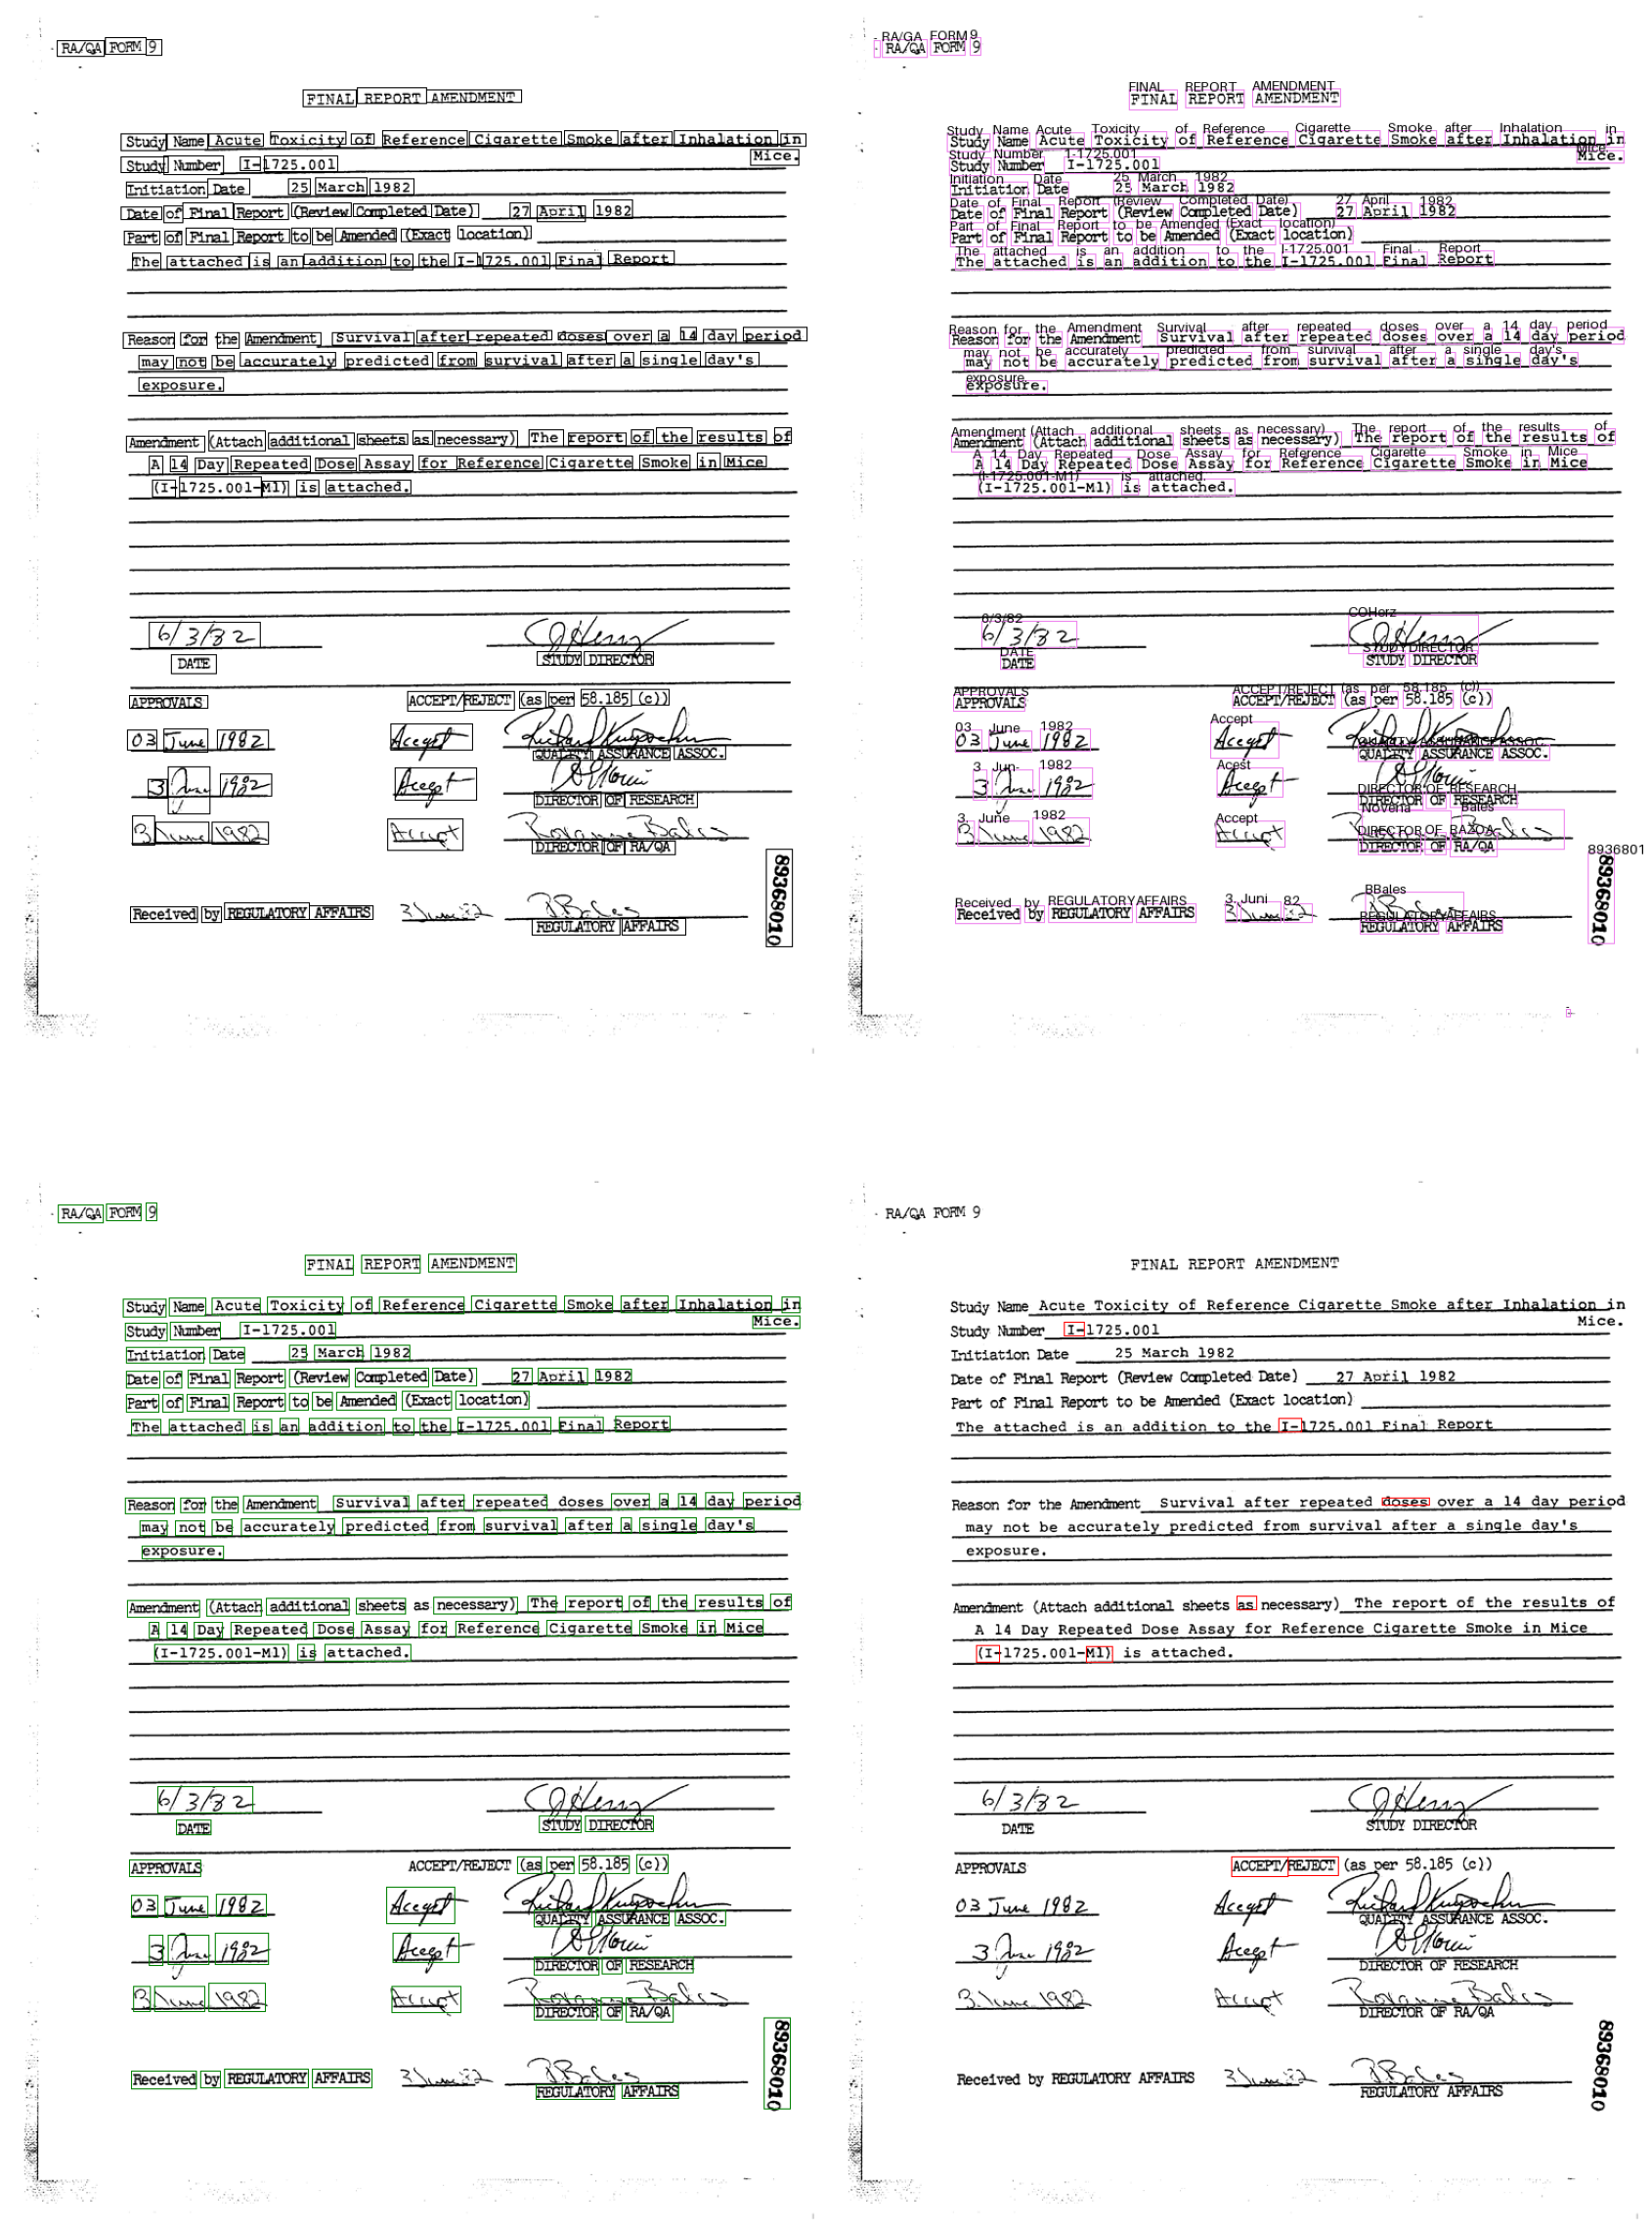

In [20]:
import matplotlib.pyplot as plt

i = 113
images = show_not_detected_ocr_tokens(i, map_gt_tokens(i, azure, iou, 'train', tolerance=5), azure, 'train', iou)

# Determine the grid size (2x2 for 4 images)
grid_rows = 2
grid_cols = 2

# Create a matplotlib figure
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(17, 25))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each image in the grid
for idx, image in enumerate(images):
    if idx < len(axes):  # Check to avoid index errors
        axes[idx].imshow(image)
        axes[idx].axis('off')  # Hide axes for better visualization

# Hide any unused grid spaces
for idx in range(len(images), len(axes)):
    axes[idx].axis('off')

# Show the grid
plt.tight_layout()
plt.show()


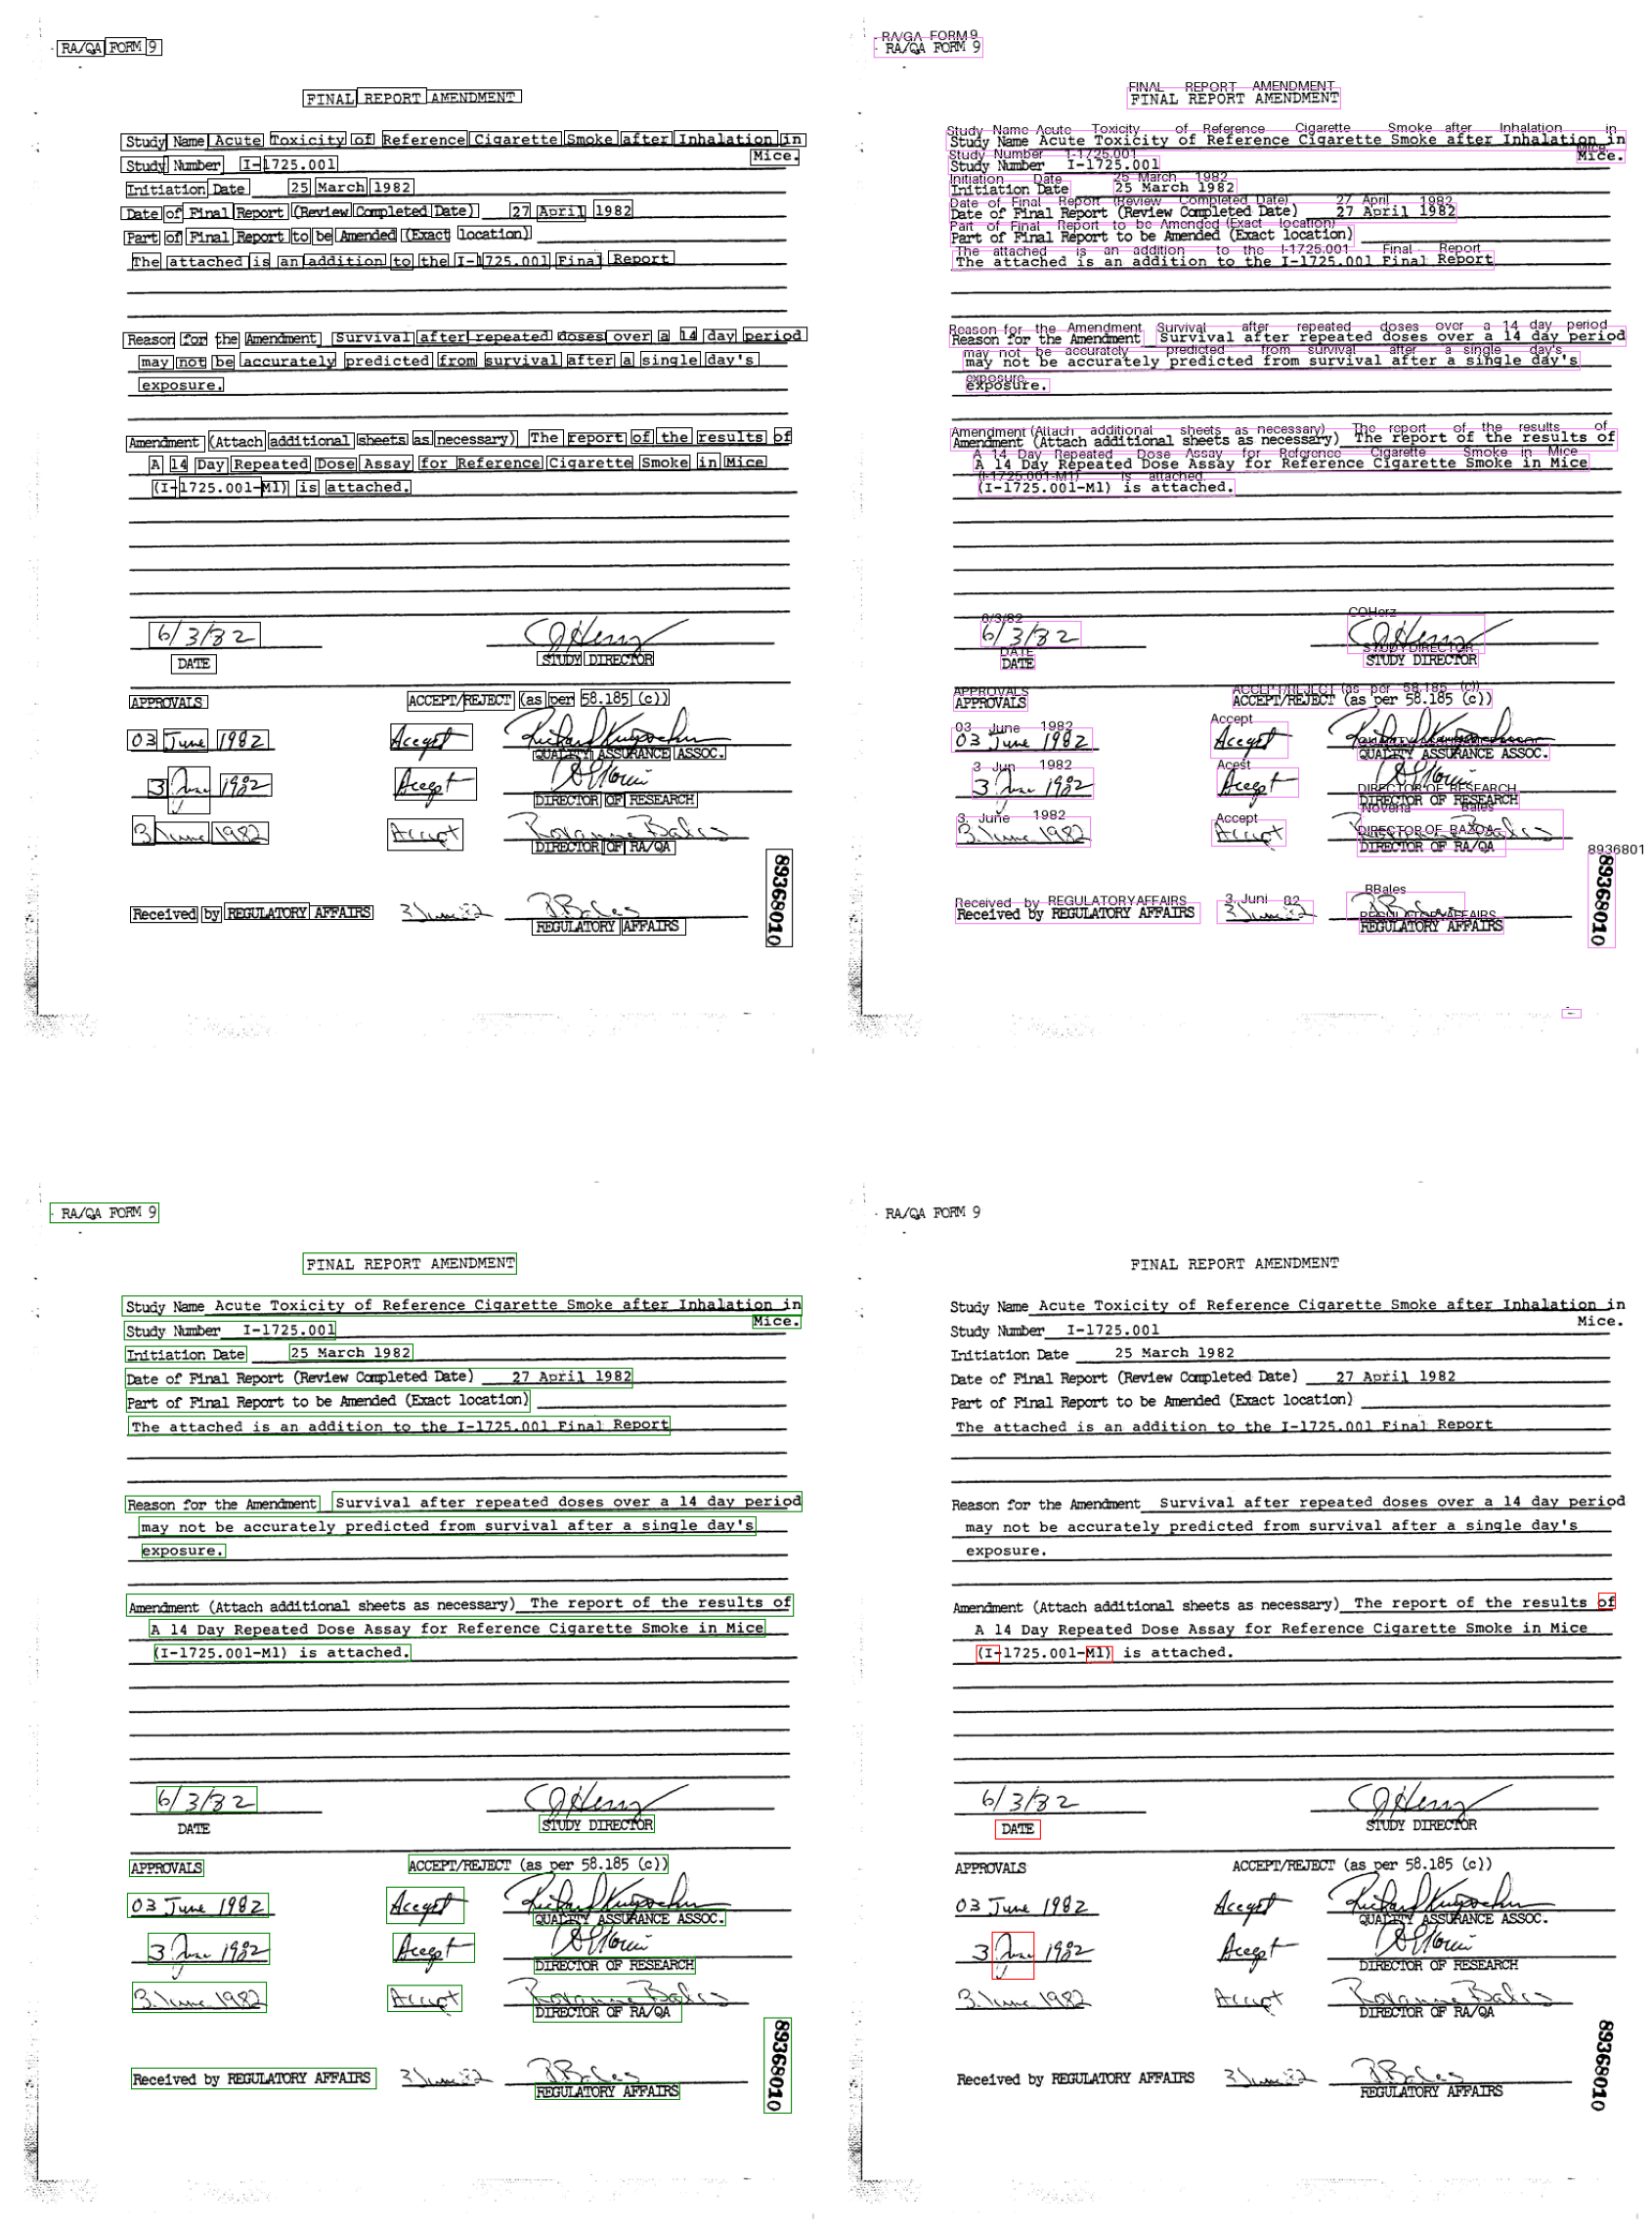

In [ ]:
i = 113
images = show_not_detected_ocr_tokens(i, map_gt_tokens(i, azure, is_box_inside, 'train'), azure, 'train', is_box_inside)

# Determine the grid size (2x2 for 4 images)
grid_rows = 2
grid_cols = 2

# Create a matplotlib figure
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(17, 25))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each image in the grid
for idx, image in enumerate(images):
    if idx < len(axes):  # Check to avoid index errors
        axes[idx].imshow(image)
        axes[idx].axis('off')  # Hide axes for better visualization

# Hide any unused grid spaces
for idx in range(len(images), len(axes)):
    axes[idx].axis('off')

# Show the grid
plt.tight_layout()
plt.show()

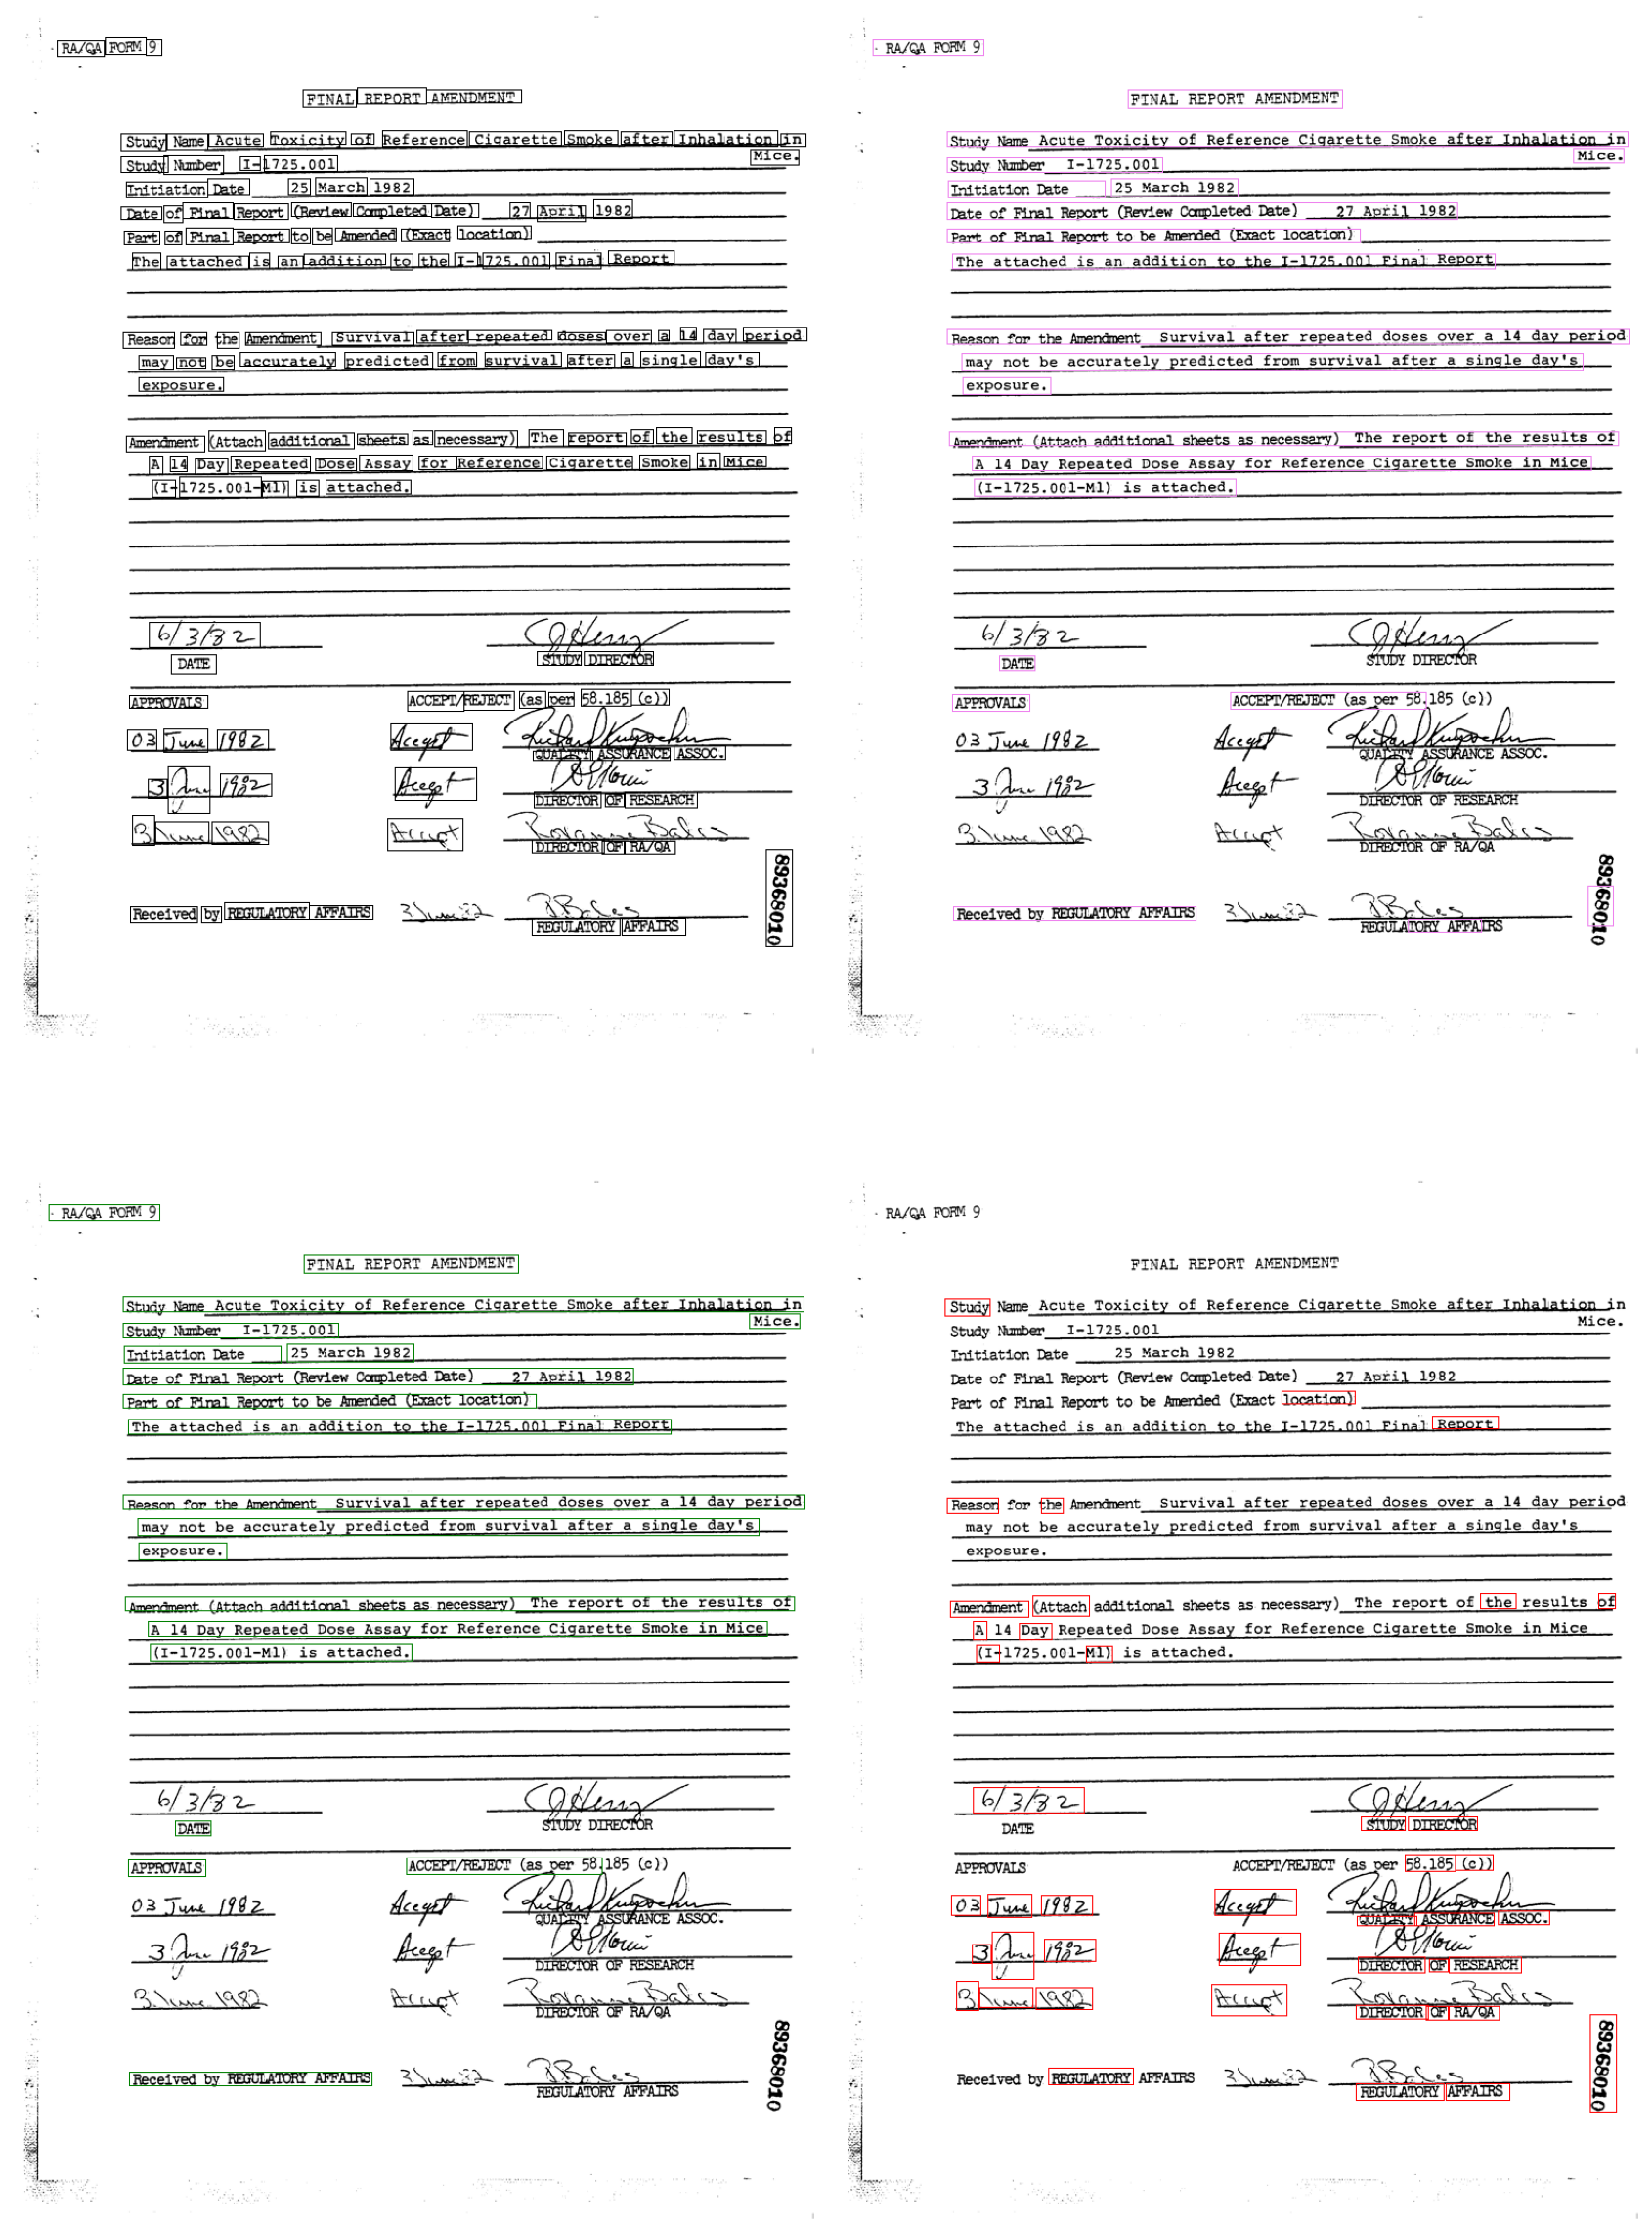

In [33]:
i = 113
images = show_not_detected_ocr_tokens(i, map_gt_tokens(i, surya, is_box_inside, 'train'), surya, 'train', is_box_inside)

# Determine the grid size (2x2 for 4 images)
grid_rows = 2
grid_cols = 2

# Create a matplotlib figure
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(17, 25))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each image in the grid
for idx, image in enumerate(images):
    if idx < len(axes):  # Check to avoid index errors
        axes[idx].imshow(image)
        axes[idx].axis('off')  # Hide axes for better visualization

# Hide any unused grid spaces
for idx in range(len(images), len(axes)):
    axes[idx].axis('off')

# Show the grid
plt.tight_layout()
plt.show()